Họ và tên: Nguyễn Minh Đăng \
Mã số sinh viên: 20230022

# Bài Thực Tập: Các Phương Pháp Cải Thiện Chất Lượng Ảnh Cơ Bản

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Báo cáo kết quả

1.a) Hiểm thị và biểu diễn ảnh trên hệ tọa độ Oxy 

(1333, 2000, 3)


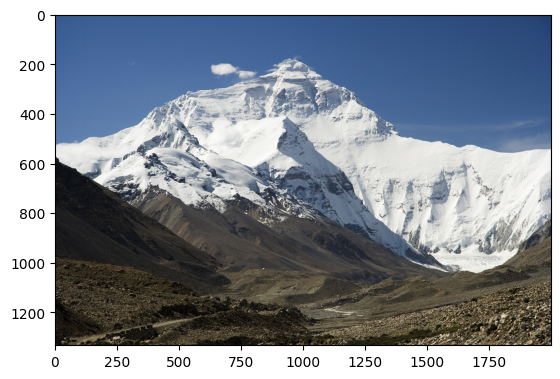

In [17]:
# Hình yêu cầu trong bài không có trong thư mục nên lấy hình trên mạng
mountain = plt.imread('mountain.jpg')
mountain.shape
plt.imshow(mountain)
print(mountain.shape)

1.b) Phóng to một vùng bất kỳ của ảnh

(350.0, 50.0)

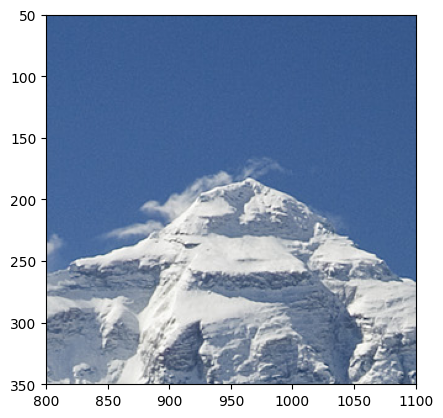

In [18]:
# Phóng to vào đỉnh núi
plt.imshow(mountain)
plt.xlim(800, 1100)
plt.ylim(350, 50)

1.c) Tách ảnh trên thành các lớp với số bit nhỏ dần

Text(0.5, 1.0, '1 bit')

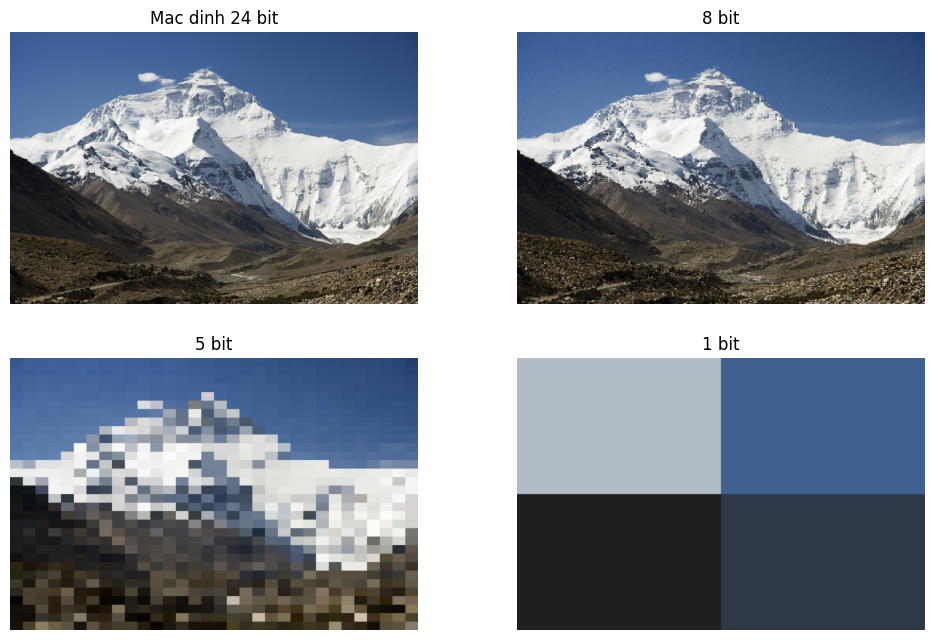

In [19]:
# Hình ban đầu 24bit

#Get input size
height, width = mountain.shape[:2]

#Desired "pixelated" size
w8, h8 = (256, 256) # 8 bit = 2^8 value
w5, h5 = (32, 32) # 5 bit = 2^5 value
w1, h1 = (2, 2) # 2 bit = 2^1 value

#Resize input to "pixelated" size
temp8 = cv2.resize(mountain, (w8, h8), interpolation=cv2.INTER_LINEAR)
temp5 = cv2.resize(mountain, (w5, h5), interpolation=cv2.INTER_LINEAR)
temp1 = cv2.resize(mountain, (w1, h1), interpolation=cv2.INTER_LINEAR)

#Initialize output image
output8 = cv2.resize(temp8, (width, height), interpolation=cv2.INTER_NEAREST)
output5 = cv2.resize(temp5, (width, height), interpolation=cv2.INTER_NEAREST)
output1 = cv2.resize(temp1, (width, height), interpolation=cv2.INTER_NEAREST)

# Show image
plt.figure(figsize=(12, 12))

plt.subplot(321)
plt.imshow(mountain)
plt.axis('off')
plt.title('Mac dinh 24 bit')

plt.subplot(322)
plt.imshow(output8)
plt.axis('off')
plt.title('8 bit')

plt.subplot(323)
plt.imshow(output5)
plt.axis('off')
plt.title('5 bit')

plt.subplot(324)
plt.imshow(output1)
plt.axis('off')
plt.title('1 bit')

1.d) Điền tên và mã số sinh viên trên title của ảnh

Text(0.5, 1.0, 'Nguyễn Minh Đăng \n20230022')

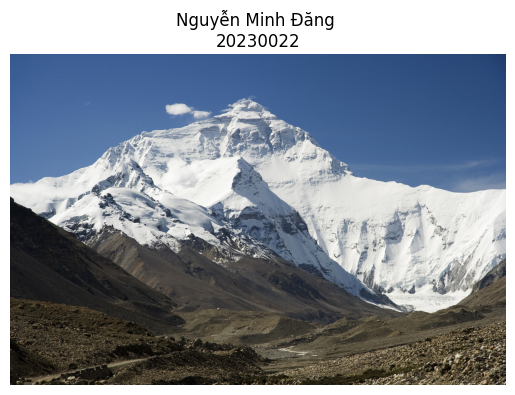

In [20]:
plt.imshow(mountain)
plt.axis('off')
plt.title('Nguyễn Minh Đăng \n' + '20230022')

1.f) Chuyển ảnh thành thang xám và trắng đen

Text(0.5, 1.0, 'Trang den')

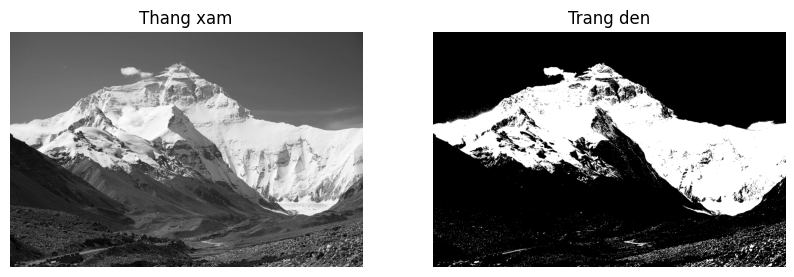

In [21]:
r = mountain[:,:,0]
g = mountain[:,:,1]
b = mountain[:,:,2]
grayscale = 0.3*r + 0.59*g + 0.11*b

m,n = grayscale.shape
output = np.zeros([m,n])
for x in range(m):
    for y in range(n):
        if grayscale[x,y] > 127:
            output[x,y] = 255
        else:
            output[x,y] = 0

plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(grayscale, cmap='gray')
plt.axis('off')
plt.title('Thang xam')

plt.subplot(122)
plt.imshow(output, cmap='gray')
plt.axis('off')
plt.title('Trang den')

1.g) Vẽ vòng tròn màu đen, tâm tại điểm giữa ảnh, bán kính 1/4 chiều cao ảnh \
Ta có phương trình đường tròn tâm I(m,n)
\begin{align*}
    &(x-m)^2 + (y-n)^2 = R^2 \\
    & \rightarrow = y^2 - 2ny + x^2 - 2mx + m^2 + n^2 - R^2 = 0 \\
    & a = 1;\ b = -2n;\ c = x^2 - 2mx + m^2 + n^2 - R^2 \\
    & \Delta = b^2 - 4ac \\
    & \text{Ta cho x chạy từ width - R đến width + R, đặt y là ẩn giải nghiệm \ Từ đây ta có 2 nghiệm phân biệt} \\
    & y_1 = \frac{-b + \sqrt{\Delta}}{2a}  \\
    & y_2 = \frac{-b - \sqrt{\Delta}}{2a}
\end{align*}

Text(1000.0, 616.5, 'R = 333.25')

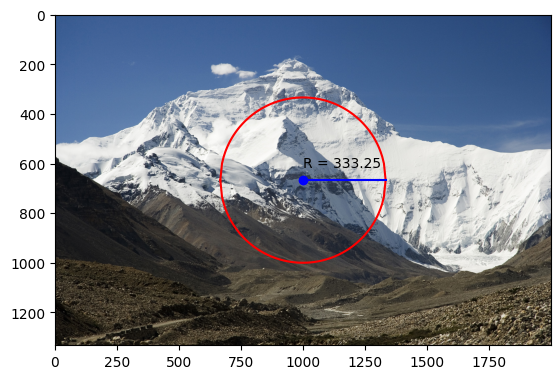

In [22]:
height, width = mountain.shape[:2]
m = width/2
n = height/2
R = height/4

yfit_1 = []
yfit_2 = []

xfit = np.linspace(width/2 - R , width/2 + R, 100)

for i in range(100):
    a = 1
    b = -2*n
    c = xfit[i]**2 - 2*m*xfit[i] + m**2 + n**2 - R**2
    delta = np.power(b, 2) - 4*a*c
    y1 = (-b + np.sqrt(delta))/(2*1)
    y2 = (-b - np.sqrt(delta))/(2*1)
    yfit_1.append(y1)
    yfit_2.append(y2)
    
plt.imshow(mountain)
plt.plot(xfit, yfit_1, color='r')
plt.plot(xfit, yfit_2, color='r')
plt.scatter(m,n, color='blue')
plt.plot([m, m+R], [n, n], color='blue')
plt.text(m, n-50, "R = " + str(R))

# Phần 2

(540, 466, 3)

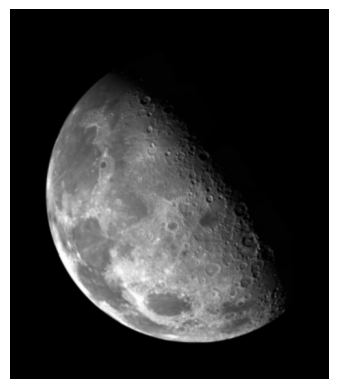

In [23]:
moon = cv2.imread("blurry_moon.tif")
plt.imshow(moon, cmap="gray")
plt.axis("off")
moon.shape

2.a) Vẽ histogram và xác định thừa sáng hay thiếu sáng

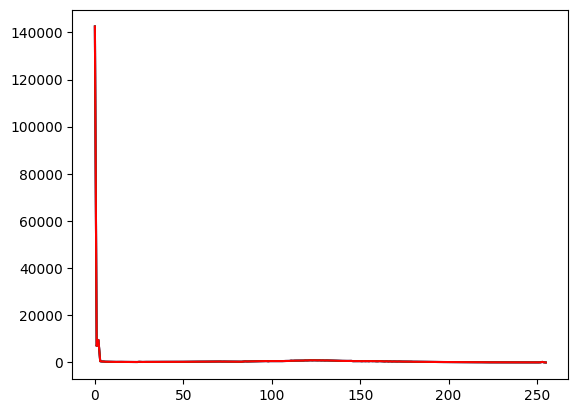

In [24]:
color = ("b", "g", "r")

for i, col in enumerate(color):
    histr = cv2.calcHist([moon],
                         [i], None,
                         [256],
                         [0, 256])
    plt.plot(histr, color=col)
    
    # Limit X - axis to 256

plt.show()


Đồ thị histogram ngã hết về bên trái \
Kết luận: Hình này thiếu sáng

2b) Biến đổi ảnh

Text(0.5, 1.0, 'Am ban')

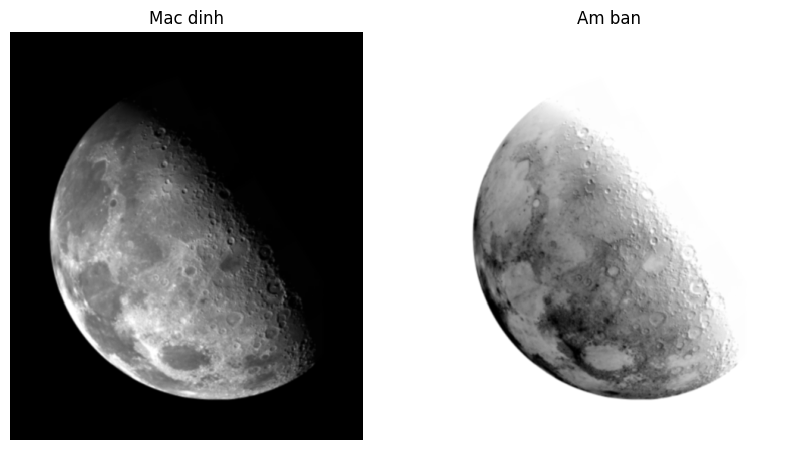

In [25]:
# Biến đổi ảnh âm bản
# s = L - 1 - r
# s = 2^{bit} - 1 - image

# cv2 ko chuyen doi dc
moon = plt.imread("blurry_moon.tif")
bit = 8
plt.figure(figsize=(10,10))

plt.subplot(121)
plt.imshow(moon, cmap="gray")
plt.axis("off")
plt.title("Mac dinh")

plt.subplot(122)
plt.imshow(np.power(2, bit) - 1 - moon, cmap="gray")
plt.axis("off")
plt.title("Am ban")

Text(0.5, 1.0, 'clog(1+r)\n c = 1')

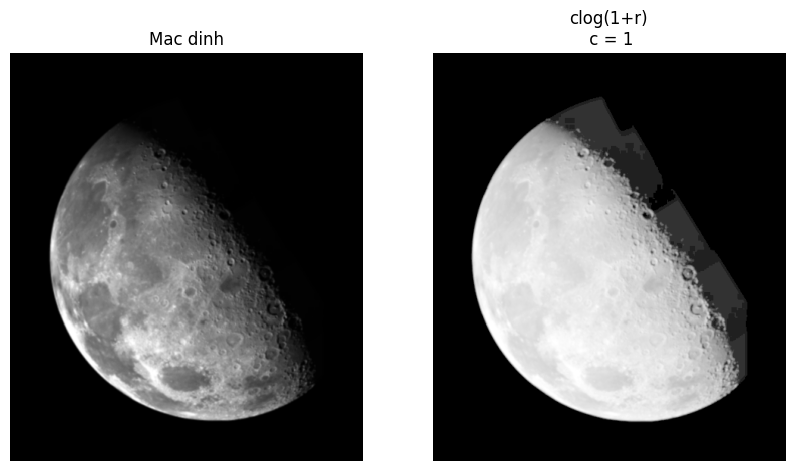

In [26]:
# Biến đổi logarithm
# s = clog(1+r)
plt.figure(figsize=(10,10))


plt.subplot(121)
plt.imshow(moon, cmap="gray")
plt.axis("off")
plt.title("Mac dinh")

plt.subplot(122)
plt.imshow(1*np.log(1 + moon), cmap="gray")
plt.axis("off")
plt.title("clog(1+r)\n c = 1")

Text(0.5, 1.0, 'gamma = 1.2')

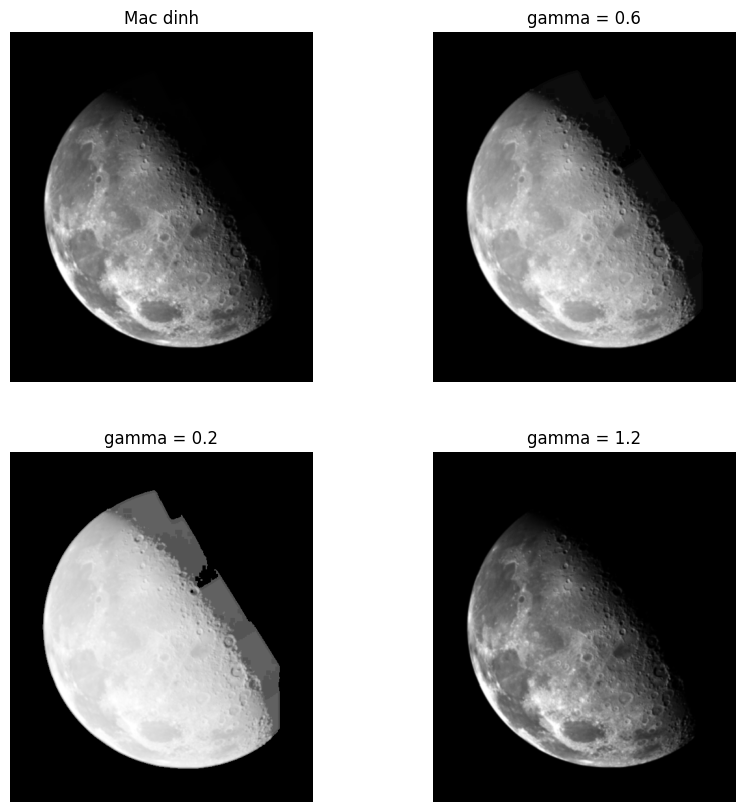

In [27]:
# Biến đổi hàm mũ
# s = cr^\gamma

plt.figure(figsize=(10,10))


plt.subplot(221)
plt.imshow(moon, cmap='gray')
plt.axis("off")
plt.title("Mac dinh")

plt.subplot(222)
s1 = 1*np.power(moon, 0.6)
plt.imshow(s1, cmap="gray")
plt.axis("off")
plt.title("gamma = 0.6")

plt.subplot(223)
s2 = 1*np.power(moon, 0.2)
plt.imshow(s2, cmap="gray")
plt.axis("off")
plt.title("gamma = 0.2")

plt.subplot(224)
s3 = 1*np.power(moon, 1.2)
plt.imshow(s3, cmap="gray")
plt.axis("off")
plt.title("gamma = 1.2")

(-0.5, 465.5, 539.5, -0.5)

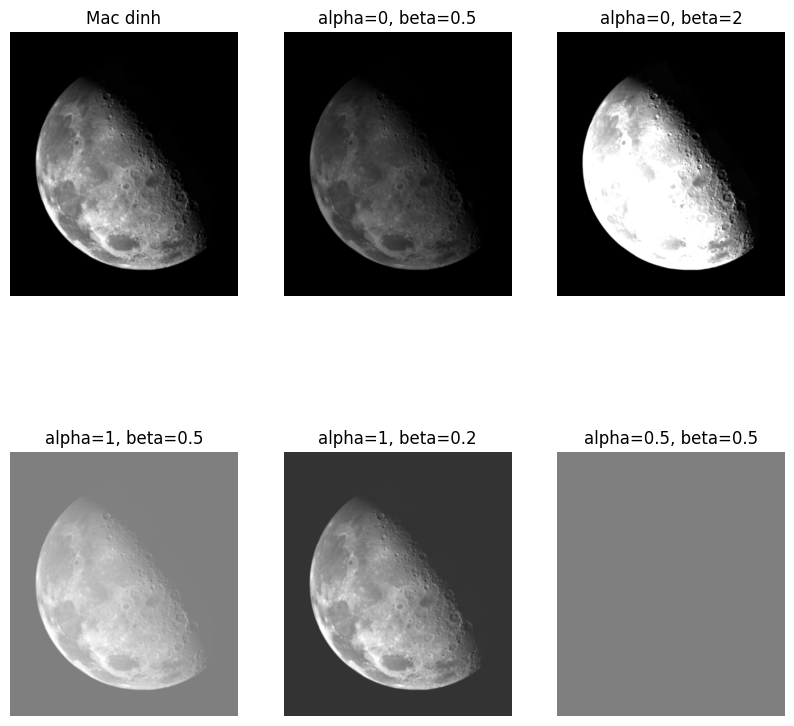

In [28]:
# bien doi tung doan

moon = cv2.imread("blurry_moon.tif", cv2.IMREAD_COLOR)

# float
norm_moon1 = cv2.normalize(moon, None, alpha=0, beta=0.5, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
norm_moon2 = cv2.normalize(moon, None, alpha=0, beta=2, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
norm_moon3 = cv2.normalize(moon, None, alpha=1, beta=0.5, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
norm_moon4 = cv2.normalize(moon, None, alpha=1, beta=0.2, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
norm_moon5 = cv2.normalize(moon, None, alpha=0.5, beta=0.5, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

# beta > 1 su dung np.clip
# scale to unit8
norm_moon1 = (255*norm_moon1).astype(np.uint8)
norm_moon2 = np.clip(norm_moon2, 0, 1)
norm_moon2 = (255*norm_moon2).astype(np.uint8)
norm_moon3 = (255*norm_moon3).astype(np.uint8)
norm_moon4 = np.clip(norm_moon4, 0, 1)
norm_moon4 = (255*norm_moon4).astype(np.uint8)
norm_moon5 = (255*norm_moon5).astype(np.uint8)

plt.figure(figsize=(10, 10))

plt.subplot(231)
plt.imshow(moon)
plt.title("Mac dinh")
plt.axis("off")


plt.subplot(232)
plt.imshow(norm_moon1)
plt.title("alpha=0, beta=0.5")
plt.axis("off")

plt.subplot(233)
plt.imshow(norm_moon2)
plt.title("alpha=0, beta=2")
plt.axis("off")

plt.subplot(234)
plt.imshow(norm_moon3)
plt.title("alpha=1, beta=0.5")
plt.axis("off")

plt.subplot(235)
plt.imshow(norm_moon4)
plt.title("alpha=1, beta=0.2")
plt.axis("off")

plt.subplot(236)
plt.imshow(norm_moon5)
plt.title("alpha=0.5, beta=0.5")
plt.axis("off")


# alpha tang do tuong phan
# beta tang do sang/toi vung sang/toi

### Kết luận: phương pháp biến đổi từng đoạn sử dụng tốt nhất vì ta có thể điểu chỉnh độ tương phản và sáng tối tùy ý mà ít ảnh hương đến chất lượng ảnh